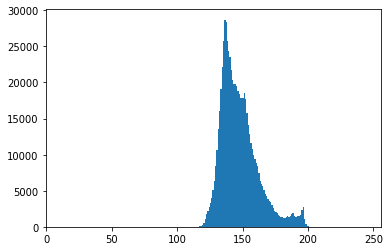

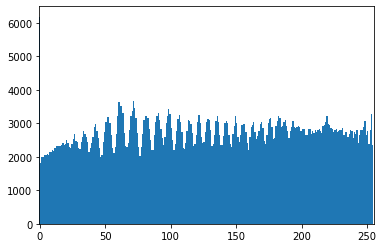

In [ ]:
#Wyrównywanie zdjęcia

import numpy as np
from PIL import Image
import pygal
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

zdjecie = Image.open("zdjecie_wejsciowe.jpg")

#konwersja zdjęcia do szarego, jednokanałowego, posiadającego tylko skalę szarości
zdjecie_szare = zdjecie.convert(mode='L')

#histogram zdjecia przed

wykres_histogramu = cv2.imread('zdjecie_wejsciowe.jpg')
wartosci = wykres_histogramu.mean(axis=2).flatten()
ilosc, bins = np.histogram(wartosci, range(257))
plt.bar(bins[:-1] - 0.5, ilosc, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()



#przekształcenie zdjęcia do postaci tablicy numpy
zdjecie_jako_tablica = np.asarray(zdjecie_szare)

#tworzenie histogramu przy pomocy wypłaszczonego obrazu
tablica_histogramu = np.bincount(zdjecie_jako_tablica.flatten(), minlength=256)

#obliczenie sumy pikseli
liczba_pikseli = np.sum(tablica_histogramu)

#normalizacja
tablica_histogramu = tablica_histogramu/liczba_pikseli

#normalizacja do skumulowanego histogramu
tablica_histogramu_skumulowanego = np.cumsum(tablica_histogramu)

#mapowanie pikseli
mapa_pikseli_przetransformowana = np.floor(255 * tablica_histogramu_skumulowanego).astype(np.uint8)

#przemiana zdjęcia z listy dwuwymiarowej do jednowymiarowej
zdjecie_jako_lista_1d = list(zdjecie_jako_tablica.flatten())

#transformacja wartości pikseli
wyrownane_zdjecie_jako_lista_1d = [mapa_pikseli_przetransformowana[i] for i in zdjecie_jako_lista_1d]

#zmiana kształtu z listy do tablicy
wyrownane_zdjecie_jako_tablica = np.reshape(np.asarray(wyrownane_zdjecie_jako_lista_1d), zdjecie_jako_tablica.shape)

#zapisanie zdjęcia wyrównanego do pliku
Image.fromarray(wyrownane_zdjecie_jako_tablica, mode='L').save("zdjecie_wyjsciowe.jpg")



#histogram zdjecia po

wykres_histogramu = cv2.imread('zdjecie_wyjsciowe.jpg')
wartosci = wykres_histogramu.mean(axis=2).flatten()
ilosc, bins = np.histogram(wartosci, range(257))
plt.bar(bins[:-1] - 0.5, ilosc, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

img = Image.open('zdjecie_wejsciowe.jpg')
img = img.convert('L')
img.save('monochromatyczny.png')
monoc = Image.open("/content/monochromatyczny.png")
pixelMap = monoc.load()
mono=Image.new(monoc.mode,monoc.size)
pixelsNew=mono.load()


min=0
max=0

wys = mono.width
sze = mono.height

for i in range(mono.size[0]):
    for j in range(mono.size[1]):
       pixelsNew[i,j] = pixelMap[i,j]

for x in range(0, wys):
  for y in range(0, sze):
    if min>mono.getpixel((x,y)):
      min=mono.getpixel((x,y))
    if max<mono.getpixel((x,y)):
      max=mono.getpixel((x,y))
    

print(min)
print(max)

for i in range(mono.size[0]):
    for j in range(mono.size[1]):
         pixelsNew[i,j] = int((pixelMap[i,j]-min)*256/(max-min))

for x in range(0, wys):
  for y in range(0, sze):
    if min>mono.getpixel((x,y)):
      min=mono.getpixel((x,y))
    if max<mono.getpixel((x,y)):
      max=mono.getpixel((x,y))
    

print(min)
print(max)

mono.save('wynik.png')

0
208
0
255
